<a href="https://colab.research.google.com/github/DylanGraves/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header = None,
                names=['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh',
                      'eighth', 'ninth', 'tenth', 'eleventh', 'twelth', 'thirteenth', 
                      'fourteenth', 'fifteenth', 'sixteenth'])

print(df.shape)

df.head()

(690, 16)


,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelth,thirteenth,fourteenth,fifteenth,sixteenth
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [2]:
df.isna().sum()

first         0
second        0
third         0
fourth        0
fifth         0
sixth         0
seventh       0
eighth        0
ninth         0
tenth         0
eleventh      0
twelth        0
thirteenth    0
fourteenth    0
fifteenth     0
sixteenth     0
dtype: int64

In [3]:
# There's suppose to be NaN values, but .isna() doesn't show any so I assume they are shown as something else.

df.head(600)

,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelth,thirteenth,fourteenth,fifteenth,sixteenth
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [4]:
import numpy as np

df = df.replace({'?':np.NaN, '+':1, '-':0})

df.isna().sum()

# Number of null values is equal to what it says in the data description file, 
# so it looks like it worked.

# Furthermore, it appears that all the values (continous, categorical, etc) are
# in the right places given the data description.

first         12
second        12
third          0
fourth         6
fifth          6
sixth          9
seventh        9
eighth         0
ninth          0
tenth          0
eleventh       0
twelth         0
thirteenth     0
fourteenth    13
fifteenth      0
sixteenth      0
dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [5]:
df.dtypes

first          object
second         object
third         float64
fourth         object
fifth          object
sixth          object
seventh        object
eighth        float64
ninth          object
tenth          object
eleventh        int64
twelth         object
thirteenth     object
fourteenth     object
fifteenth       int64
sixteenth       int64
dtype: object

In [8]:
accepted = df[df['sixteenth'] == 1]

print(accepted.shape)

accepted.head()

(307, 16)


,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelth,thirteenth,fourteenth,fifteenth,sixteenth
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [10]:
rejected = df[df['sixteenth'] == 0]

print(rejected.shape)

rejected.head()

(383, 16)


,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelth,thirteenth,fourteenth,fifteenth,sixteenth
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,00420,0,0
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,0
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,00980,0,0
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,00400,0,0
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,00160,2,0


In [11]:
df.shape

# Looks good.

(690, 16)

In [12]:
accepted.head()

,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelth,thirteenth,fourteenth,fifteenth,sixteenth
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [0]:
import matplotlib.pyplot as plt

In [14]:
df.dtypes

first          object
second         object
third         float64
fourth         object
fifth          object
sixth          object
seventh        object
eighth        float64
ninth          object
tenth          object
eleventh        int64
twelth         object
thirteenth     object
fourteenth     object
fifteenth       int64
sixteenth       int64
dtype: object

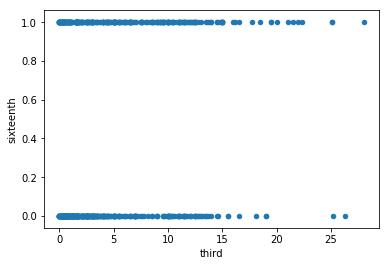

In [15]:
ax1 = df.plot.scatter(x='third', y='sixteenth')

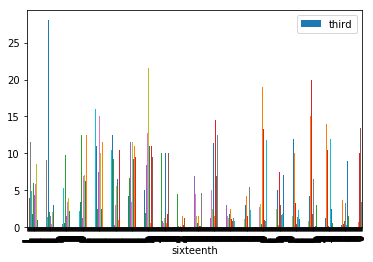

In [17]:
df.plot.bar(x='sixteenth', y='third');

# Not exactly what I was looking for.

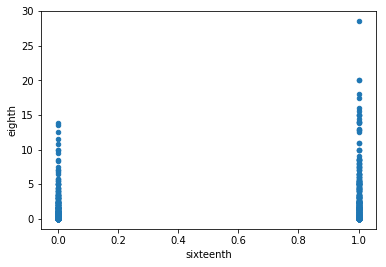

In [19]:
df.plot.scatter(x='sixteenth', y='eighth');

In [0]:
from scipy import stats

In [21]:
stats.ttest_1samp(accepted['fifteenth'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=4.663813699093638, pvalue=4.644002354009927e-06)

In [22]:
rejected.head(20)

,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelth,thirteenth,fourteenth,fifteenth,sixteenth
70,b,32.33,7.500,u,g,e,bb,1.585,t,f,0,t,s,00420,0,0
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,0
72,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,00980,0,0
73,b,44.25,0.500,u,g,m,v,10.750,t,f,0,f,s,00400,0,0
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,00160,2,0
75,b,20.67,5.290,u,g,q,v,0.375,t,t,1,f,g,00160,0,0
76,b,34.08,6.500,u,g,aa,v,0.125,t,f,0,t,g,00443,0,0
77,a,19.17,0.585,y,p,aa,v,0.585,t,f,0,t,g,00160,0,0
78,b,21.67,1.165,y,p,k,v,2.500,t,t,1,f,g,00180,20,0
79,b,21.50,9.750,u,g,c,v,0.250,t,f,0,f,g,00140,0,0


In [23]:
df['second'] = df['second'].astype(float)
accepted['second'] = accepted['second'].astype(float)
rejected['second'] = rejected['second'].astype(float)

print(df.dtypes)
print(accepted.dtypes)
print(rejected.dtypes)

first          object
second        float64
third         float64
fourth         object
fifth          object
sixth          object
seventh        object
eighth        float64
ninth          object
tenth          object
eleventh        int64
twelth         object
thirteenth     object
fourteenth     object
fifteenth       int64
sixteenth       int64
dtype: object
first          object
second        float64
third         float64
fourth         object
fifth          object
sixth          object
seventh        object
eighth        float64
ninth          object
tenth          object
eleventh        int64
twelth         object
thirteenth     object
fourteenth     object
fifteenth       int64
sixteenth       int64
dtype: object
first          object
second        float64
third         float64
fourth         object
fifth          object
sixth          object
seventh        object
eighth        float64
ninth          object
tenth          object
eleventh        int64
twelth         object
thir

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
stats.ttest_ind(accepted['second'], rejected['second'], nan_policy='omit')

# There is a statistically significant difference between the values of the 
# second column for those accepted for a credit card and those rejected.

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

In [25]:
stats.ttest_ind(accepted['third'], rejected['third'], nan_policy='omit')

# The same goes for the third column, which suggests that whatever these 
# columns represent do in fact affect whether one is accepted or 
# rejected for a credit card.

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

In [26]:
df['fourteenth'] = df['fourteenth'].astype(float)
accepted['fourteenth'] = accepted['fourteenth'].astype(float)
rejected['fourteenth'] = rejected['fourteenth'].astype(float)

print(df.dtypes)
print(accepted.dtypes)
print(rejected.dtypes)

# I have a theory that the fourteenth column isn't representing anything 
# that would affect the acceptance rate, but I have to check to make sure.

first          object
second        float64
third         float64
fourth         object
fifth          object
sixth          object
seventh        object
eighth        float64
ninth          object
tenth          object
eleventh        int64
twelth         object
thirteenth     object
fourteenth    float64
fifteenth       int64
sixteenth       int64
dtype: object
first          object
second        float64
third         float64
fourth         object
fifth          object
sixth          object
seventh        object
eighth        float64
ninth          object
tenth          object
eleventh        int64
twelth         object
thirteenth     object
fourteenth    float64
fifteenth       int64
sixteenth       int64
dtype: object
first          object
second        float64
third         float64
fourth         object
fifth          object
sixth          object
seventh        object
eighth        float64
ninth          object
tenth          object
eleventh        int64
twelth         object
thir

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
stats.ttest_ind(accepted['fourteenth'], rejected['fourteenth'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [28]:
df.head()

# Time for some chi-squared tests.

,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelth,thirteenth,fourteenth,fifteenth,sixteenth
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [29]:
contingency_table =  pd.crosstab(df['sixteenth'], df['fourth'])
contingency_table

fourth,l,u,y
sixteenth,,,
0,0,263,118
1,2,256,45


In [30]:
# Testing the fourth column to see if it's related to acceptance.

chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

# They appear to be dependent/related on some level.

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[  1.11403509 289.09210526  90.79385965]
 [  0.88596491 229.90789474  72.20614035]]


In [31]:
# Let's try with the fifth column.

contingency_table2 =  pd.crosstab(df['sixteenth'], df['fifth'])
contingency_table2

fifth,g,gg,p
sixteenth,,,
0,263,0,118
1,256,2,45


In [32]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table2)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

# Similar result.

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[289.09210526   1.11403509  90.79385965]
 [229.90789474   0.88596491  72.20614035]]


In [36]:
contingency_table3 =  pd.crosstab(df['sixteenth'], df['first'])
contingency_table3

first,a,b
sixteenth,,
0,112,262
1,98,206


In [37]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table3)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

# Result where they do not seem to be dependent. Or, at least we need to run
# more experiments/data.

Chi-Squared: 0.3112832649161994
P-value: 0.5768937883001118
Degrees of Freedom: 1
Expected: 
 [[115.84070796 258.15929204]
 [ 94.15929204 209.84070796]]


In [35]:
df.head()

,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,eleventh,twelth,thirteenth,fourteenth,fifteenth,sixteenth
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [38]:
# More t-tests. Running all the numeric columns in order to test.
stats.ttest_ind(accepted['second'], rejected['second'], nan_policy='omit')

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

In [39]:
stats.ttest_ind(accepted['third'], rejected['third'], nan_policy='omit')

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

In [33]:
stats.ttest_ind(accepted['eighth'], rejected['eighth'], nan_policy='omit')

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

In [34]:
stats.ttest_ind(accepted['eleventh'], rejected['eleventh'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [40]:
stats.ttest_ind(accepted['fourteenth'], rejected['fourteenth'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [41]:
stats.ttest_ind(accepted['fifteenth'], rejected['fifteenth'], nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [42]:
# Running more chi-squared tests.
cont1 =  pd.crosstab(df['sixteenth'], df['first'])
cont1

first,a,b
sixteenth,,
0,112,262
1,98,206


In [43]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(cont1)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.3112832649161994
P-value: 0.5768937883001118
Degrees of Freedom: 1
Expected: 
 [[115.84070796 258.15929204]
 [ 94.15929204 209.84070796]]


In [44]:
cont6 = pd.crosstab(df['sixteenth'], df['sixth'])
cont7 = pd.crosstab(df['sixteenth'], df['seventh'])
cont9 = pd.crosstab(df['sixteenth'], df['ninth'])
cont10 = pd.crosstab(df['sixteenth'], df['tenth'])
cont12 = pd.crosstab(df['sixteenth'], df['twelth'])
cont13 = pd.crosstab(df['sixteenth'], df['thirteenth'])


chi_squared, p_value, dof, expected = stats.chi2_contingency(cont6)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 98.32520342679135
P-value: 3.4999300402715717e-15
Degrees of Freedom: 13
Expected: 
 [[29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.66519824
  35.52422907 21.09251101]
 [24.02643172 60.95594714 18.24229075 13.34801762 11.12334802 23.5814978
  26.25110132  4.44933921 22.69162996 16.90748899 34.70484581  1.33480176
  28.47577093 16.90748899]]


In [50]:
cont6

sixth,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
sixteenth,,,,,,,,,,,,,,
0,35,75,12,23,11,46,45,7,37,22,27,1,31,6
1,19,62,29,7,14,7,14,3,14,16,51,2,33,32


In [45]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(cont7)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 45.03420714024057
P-value: 3.6254528723722447e-07
Degrees of Freedom: 8
Expected: 
 [[ 32.74889868   3.33039648  31.63876652  76.59911894   4.44052863
    2.22026432   1.11013216 221.47136564   4.44052863]
 [ 26.25110132   2.66960352  25.36123348  61.40088106   3.55947137
    1.77973568   0.88986784 177.52863436   3.55947137]]


In [46]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(cont9)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[182.61884058 200.38115942]
 [146.38115942 160.61884058]]


In [47]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(cont10)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 143.06956205083148
P-value: 5.6757273745274924e-33
Degrees of Freedom: 1
Expected: 
 [[219.25362319 163.74637681]
 [175.74637681 131.25362319]]


In [48]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(cont12)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

# Finally a result that is not statistically significant!

Chi-Squared: 0.568273300792113
P-value: 0.45094587758631943
Degrees of Freedom: 1
Expected: 
 [[207.59710145 175.40289855]
 [166.40289855 140.59710145]]


In [49]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(cont13)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 9.191570451545381
P-value: 0.010094291370456372
Degrees of Freedom: 2
Expected: 
 [[346.92028986   4.44057971  31.63913043]
 [278.07971014   3.55942029  25.36086957]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. I ran t-tests for the second and third columns to see if the values of those accepted for a credit card and those rejected were significantly different. They did in fact seem to relate to acceptance since the p-value was very small which makes the results statistically significant, suggesting that the values of those columns do affect acceptance.

2. Similarly, I applied the chi-squared test to the fourth and fifth columns which resulted in statistically significant results, suggesting that the values of those columns are related/dependent on whether one was rejected or not.

3. Probably the most challenging part was attempting to understand all this data that I did not know what it actually represented. I could do the tests and make plots but I am a little in the dark for what any of the data actually means. Given more time I could explore in greater detail and try to a deeper analysis, but right now I'm mostly just using chi-squared and t tests to see if there is some sort of relationship between the columns and acceptance/rejection.